<a href="https://colab.research.google.com/github/SridharKalalae/LocalRepo/blob/main/M2_MP1_NB_Spam_Classification_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generative AI and Prompt Engineering
## A program by IISc and TalentSprint
### Mini-Project: Spam Classification

## Problem Statement

Generating a prompt / prompts using no code based LLMs to solve a text classification problem.

Dataset: Spam / ham classification

## Learning Objectives

At the end of the mini-project, you will be able to :

* Understand how to successfuly generate code using LLMs

* Following sections will help you understand the various steps required for text classification:
  * Create text vectorization layer.
  * Create embeddings of words in the message.
  * Visualize the different categories of words.
  * Build a model to classify the messages as Spam or Ham.
  * Get the evaluation score of the model.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Dataset

The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

Link: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

## Instructions

* Use the SMS Spam collection dataset.
* Based on your understanding of steps required to do text classification from previous assignments, generate the code using LLM to accomplish the task.
* There is no restriction on the number of prompts or choice of LLM.
* Do not use a pretrained model.
* Use any LLM to pass prompts and generate code from it.
* All the sections are to be solved by making use of prompts.
* Feel free to add/delete ccode cells as you may require.
* Use any number of code cells/prompts to solve any particular section.

## Parameters of evaluations

* Accuracy on Test data set
* Choice of preprocessing steps
* Model Architecture
* Design parameters choice
* Number of experiments conducted
* Parameter tuning
* Visualizations
  * Train validation loss & other metrics
  * Word clouds of words in each category
  * Embeddings visualizations


## **HINT**

Please take hints from the assignment released in module 1, **[M1_AST_02_TextVectorization_and_Embedding_Layers](https://drive.google.com/drive/folders/17J8eaehDycpqypduEcmUyubyXlFr-gD2?usp=drive_link)**

## Grading = 10 Points

### Import Neccesary Packages

In [ ]:
# Initial Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model, callbacks
from tensorflow.keras.layers import TextVectorization, Embedding, Dense

from sklearn.decomposition import PCA

import re
import nltk
from nltk.tokenize import word_tokenize,TweetTokenizer

### Read the Data (1 point)

In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/AI Datasets/Miniproject/spam.csv', encoding = 'latin-1')

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [ ]:
df.columns = ['label', 'text']

In [ ]:
df.shape

(5572, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
print(df.label.value_counts(normalize=True))

label
ham     0.865937
spam    0.134063
Name: proportion, dtype: float64


In [ ]:
df = pd.concat([df[['text']], pd.get_dummies(df[['label']],drop_first=True,dtype=int)], axis=1)

In [ ]:
df.head()

,text,label_spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
df_train = df[:4000]
df_val = df[4000:4572]
df_test = df[4572:5572]

In [ ]:
X_train, y_train = df_train['text'], df_train['label_spam']
X_val, y_val = df_val['text'], df_val['label_spam']
X_test, y_test = df_test['text'], df_test['label_spam']

In [ ]:
print(f'Train Data shape : {X_train.shape, y_train.shape}')
print(f'Validation Data shape : {X_val.shape, y_val.shape}')
print(f'Test Data shape : {X_test.shape, y_test.shape}')

Train Data shape : ((4000,), (4000,))
Validation Data shape : ((572,), (572,))
Test Data shape : ((1000,), (1000,))


### Apply the Vectorization (1 point)

In [ ]:
max_length = 1000
max_tokens = 7900

text_vectorization = TextVectorization(
    output_mode = 'int',
    max_tokens = max_tokens,
    output_sequence_length = max_length
)

In [ ]:
text_vectorization.adapt(X_train)

In [ ]:
vocabulary = text_vectorization.get_vocabulary()
print(f"vocabulary = {vocabulary}")
print(f"len(vocabulary) = {len(vocabulary)}")

vocabulary = ['', '[UNK]', 'to', 'i', 'you', 'a', 'the', 'u', 'and', 'is', 'in', 'me', 'my', 'for', 'your', 'of', 'it', 'have', 'call', 'on', 'that', 'are', 'now', '2', 'not', 'im', 'but', 'so', 'at', 'or', 'can', 'be', 'get', 'do', 'ur', 'will', 'with', 'just', 'if', 'we', 'no', 'this', 'up', 'when', 'its', 'ltgt', 'ok', 'dont', 'out', 'free', 'from', '4', 'all', 'know', 'go', 'how', 'what', 'ill', 'like', 'am', 'then', 'got', 'good', 'come', 'was', 'day', 'love', 'there', 'time', 'only', 'as', 'send', 'text', 'want', 'he', 'going', 'txt', 'by', 'one', 'still', 'sorry', 'lor', 'about', 'r', 'need', 'back', 'home', 'reply', 'our', 'n', 'see', 'today', 'they', 'stop', 'hi', 'well', 'think', 'new', 'she', 'any', 'da', 'been', 'here', 'phone', 'Ì', 'please', 'tell', 'later', 'did', 'take', 'some', 'mobile', 'cant', 'night', 'happy', 'dear', 'claim', 'an', 'her', 'has', 'week', 'too', 'who', 'where', 'much', 'great', 'more', 'way', 'oh', 'hey', 'right', 'him', 'say', 'had', 'work', 'wat', 

**Apply TextVec to train, val, test set**

In [ ]:
X_train_int = text_vectorization(X_train)
X_val_int = text_vectorization(X_val)
X_test_int = text_vectorization(X_test)

In [ ]:
X_train[:1]


,text
0,"Go until jurong point, crazy.. Available only ..."


In [ ]:
X_train_int[:1]

<tf.Tensor: shape=(1, 1000), dtype=int64, numpy=
array([[  54,  378, 5722,  711,  744,  679,   69,   10, 1225,   89,  125,
         341, 1367,  143, 3211, 1069,   67,   61, 7391,  135,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,  

### Design the Model (1 point)

In [ ]:
max_tokens = 7900
inputs = keras.Input(shape=(1,), dtype=tf.string)

# text vectorization layer
txt_vec_out = text_vectorization(inputs)

# embedding layer
embedded = layers.Embedding(input_dim=max_tokens, output_dim=256, name='embedding')(txt_vec_out)

# dense layers
x = layers.Dense(256, activation='relu')(embedded)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(32, activation='relu')(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model = Model(inputs, outputs)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 1)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ text_vectorization                   │ (None, 1000)                │               0 │
│ (TextVectorization)                  │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 1000, 256)           │       2,022,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1000, 256)           │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1000, 128)           │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1000, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1000, 32)            │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1000, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1000, 1)             │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,125,249 (8.11 MB)

 Trainable params: 2,125,249 (8.11 MB)

 Non-trainable params: 0 (0.00 B)

### Extract the Embeddings before Training (1 point)

In [ ]:
# Get the vocabulary from the TextVectorization layer
vocab = text_vectorization.get_vocabulary()
print(len(vocab))

# Get the embedding layer
embedding_layer = model.get_layer('embedding')

# Get the embeddings
embeddings = embedding_layer.get_weights()[0]
embeddings.shape

7900


(7900, 256)

In [ ]:
def case_to_lower(txt):
    """Normalizing the case to lower case"""
    text = [twt.lower() for twt in txt]
    return text

In [ ]:
def rem_spec_char(txt):
    """Removing Special Characters"""
    text = [re.sub('[^a-zA-Z0-9]', ' ', txt_c) for txt_c in txt]
    return text

In [ ]:
test_str = X_train.values

In [ ]:
test_ls = case_to_lower(test_str)
test_ls_1 = rem_spec_char(test_ls)
# tokenize using Tweet Tokenizer from NLTK
tkn = TweetTokenizer()

test_words = [tkn.tokenize(sent) for sent in test_ls_1]
print(test_words[0])

['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat']


In [ ]:
pca = PCA(n_components=2, random_state=42)

# Fit and transform the vectors using PCA model
reduced_untrained_emb = pca.fit_transform(embeddings)
reduced_untrained_emb.shape

(7900, 2)

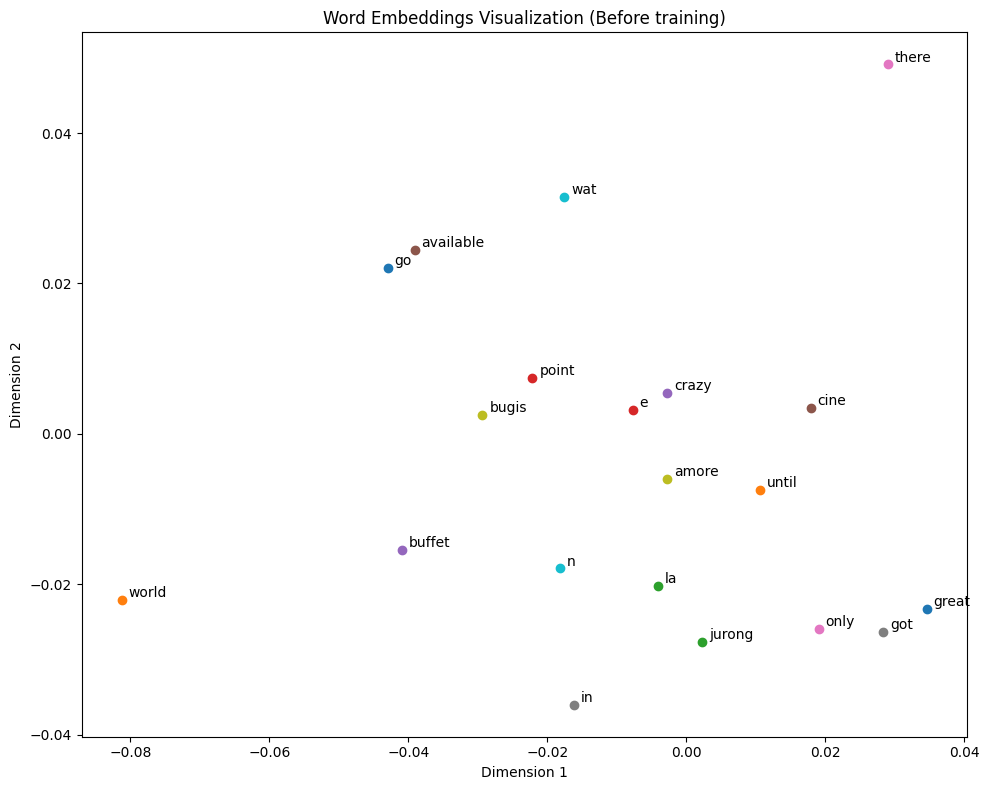

In [ ]:
# Visualize the embeddings before model training

plt.figure(figsize=(10, 8))
for word in test_words[0]:
    if word != '':  # Skip the empty string token
        x, y = reduced_untrained_emb[vocab.index(word)]
        plt.scatter(x, y)
        plt.annotate(word, (x, y), xytext=(5, 2), textcoords='offset points')

# plt.annotate(word, (x, y), xytext=(5, 2), textcoords='offset points')
plt.title("Word Embeddings Visualization (Before training)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.tight_layout()
plt.show()

### Train the Model (1 point)

In [ ]:
# Fit the model on train set
callbacks = [keras.callbacks.ModelCheckpoint("one_hot_dense.keras", save_best_only=True)]

history = model.fit(X_train, y_train,epochs=10,batch_size=32,
                    validation_data=(X_val, y_val), callbacks=callbacks)


Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 100s 770ms/step - accuracy: 0.8432 - loss: 0.4540 - val_accuracy: 0.8619 - val_loss: 0.4049
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 141s 773ms/step - accuracy: 0.8604 - loss: 0.4219 - val_accuracy: 0.8622 - val_loss: 0.4172
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 135s 717ms/step - accuracy: 0.8599 - loss: 0.4203 - val_accuracy: 0.8623 - val_loss: 0.4036
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 91s 727ms/step - accuracy: 0.8633 - loss: 0.4119 - val_accuracy: 0.8623 - val_loss: 0.4191
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 98s 778ms/step - accuracy: 0.8751 - loss: 0.3883 - val_accuracy: 0.8623 - val_loss: 0.4041
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 136s 736ms/step - accuracy: 0.8646 - loss: 0.4093 - val_accuracy: 0.8623 - val_loss: 0.4049
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 146s 769ms/step - accuracy: 0.8625 - loss: 0.4095 - val_accuracy: 0.8623 - val_loss: 0.4232
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 102s 819ms/step - accuracy: 0.8685 - l

### During Training Collect the loss and Metrics of Train and Validation. Plot the Metrics after Training (1 point)

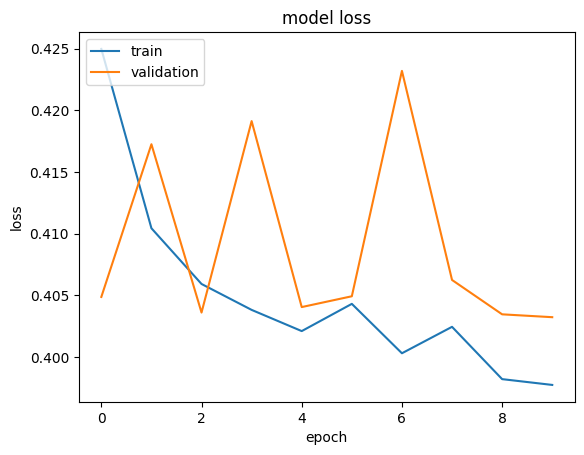

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Calculate and Display the Test Performance (1 point)

In [ ]:
## Load saved model
model = keras.models.load_model("one_hot_dense.keras")


# evaluate model on 'test_dataset'
model.evaluate(X_test, y_test)


32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 168ms/step - accuracy: 0.8554 - loss: 0.4146


[0.3933369815349579, 0.8676140308380127]

### Extract the Embeddings after Training (1 point)

In [ ]:
# Get the embedding layer
trained_embedding_layer = model.get_layer('embedding')

# Get the embeddings
trained_embeddings = trained_embedding_layer.get_weights()[0]
trained_embeddings.shape

(7900, 256)

### Reduce the Embeddings using PCA (1 point)

In [ ]:
pca = PCA(n_components=2, random_state=42)

# Fit and transform the vectors using PCA model
# reduced_trained_emb = pca.fit_transform(embeddings)
reduced_trained_emb = pca.fit_transform(trained_embeddings)
reduced_trained_emb.shape

(7900, 2)

### Plot the Embeddings in 2D (1 point)

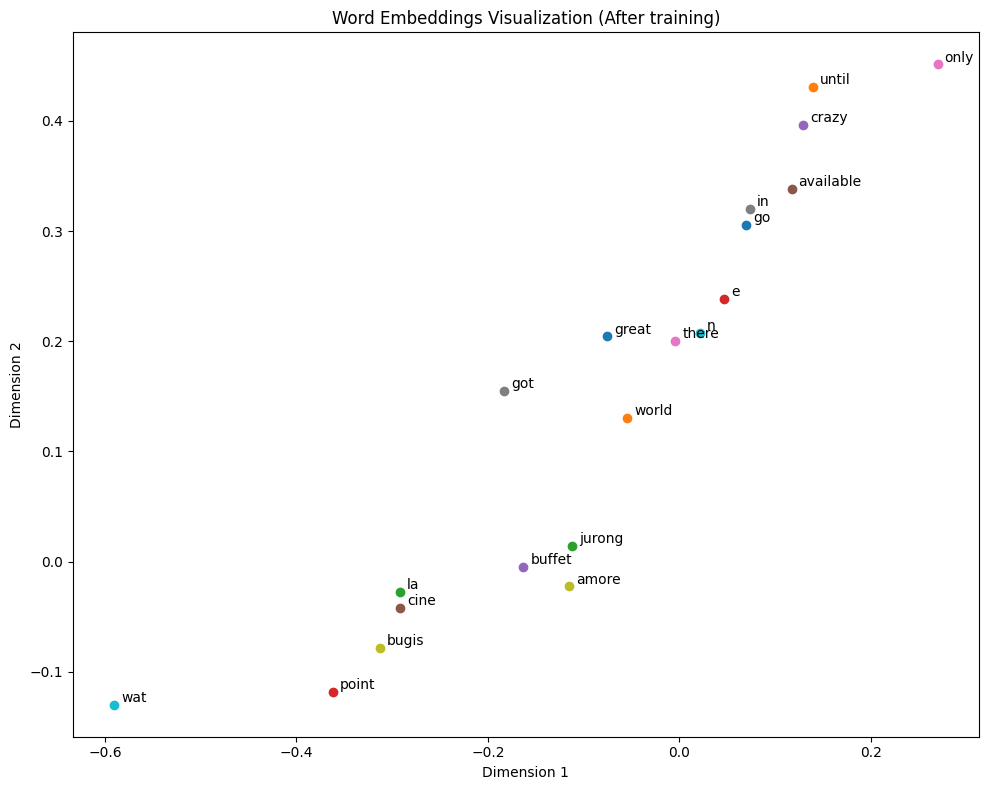

In [ ]:
# Visualize the embeddings after model training

plt.figure(figsize=(10, 8))
for word in test_words[0]:
    if word != '':  # Skip the empty string token
        x, y = reduced_trained_emb[vocab.index(word)]
        plt.scatter(x, y)
        plt.annotate(word, (x, y), xytext=(5, 2), textcoords='offset points')

# plt.annotate(word, (x, y), xytext=(5, 2), textcoords='offset points')
plt.title("Word Embeddings Visualization (After training)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.tight_layout()
plt.show()

